In [1]:
import pandas as pd 
df=pd.read_csv("D:\\vs code\\SVM\\\Dataset for svm numeric example.csv")
df

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\pruth\AppData\Local\Temp\ipykernel_17524\3112632712.py:2: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv("D:\\vs code\\SVM\\\Dataset for svm numeric example.csv")


,Positive Label (Pos):,Negative Label (Neg):
0,"(3, 2)","(1, 1)"
1,"(4, 1)","(2, 0)"
2,"(4, -1)","(2, 2)"
3,"(5, 2)","(-1, 1)"
4,"(5, 0)","(-1, -1)"
5,"(6, 2)","(0, 2)"
6,"(6, 0)","(0, -2)"
7,"(7, 1)","(-2, 1)"
8,"(7, -1)","(-2, -1)"
9,"(8, 2)","(-3, 0)"


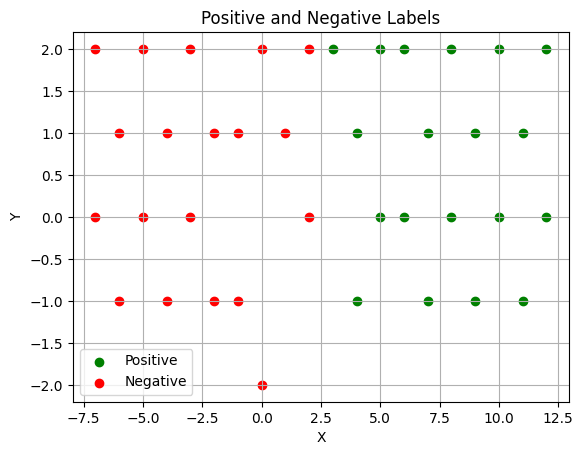

In [2]:
import matplotlib.pyplot as plt

# Define the data
# data = [
#     ((3, 2), (1, 1)),
#     ((4, 1), (2, 0)),
#     ((4, -1), (2, 2)),
#     ((5, 2), (-1, 1)),
#     ((5, 0), (-1, -1)),
#     ((6, 2), (0, 2)),
#     ((6, 0), (0, -2)),
#     ((7, 1), (-2, 1)),
#     ((7, -1), (-2, -1)),
#     ((8, 2), (-3, 0)),
#     ((8, 0), (-3, 2)),
#     ((9, 1), (-4, 1)),
#     ((9, -1), (-4, -1)),
#     ((10, 2), (-5, 0)),
#     ((10, 0), (-5, 2)),
#     ((11, 1), (-6, 1)),
#     ((11, -1), (-6, -1)),
#     ((12, 2), (-7, 0)),
#     ((12, 0), (-7, 2))
# ]
data = [
    ((3, ), (1, 1)),
    ((4, 1), (2, 0)),
    ((4, -1), (2, 2)),
    ((5, 2), (-1, 1))]


# Extract positive and negative labels
positive_labels = [pos for pos, _ in data]
negative_labels = [neg for _, neg in data]

# Unpack positive and negative labels into x and y coordinates
positive_x, positive_y = zip(*positive_labels)
negative_x, negative_y = zip(*negative_labels)

# Plot positive labels as green dots and negative labels as red dots
plt.scatter(positive_x, positive_y, color='green', label='Positive')
plt.scatter(negative_x, negative_y, color='red', label='Negative')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Positive and Negative Labels')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


## from the graph we can see that (2,2,1) and (2,0,1) ,(3,2,1)  ara the support vectors

In [3]:
s1 = (2, 2, 1) #negative
s2 = (2, 0, 1) #negative
s3 = (3, 2, 1) #positive

In [ ]:
'''# Equations
alpha_1 * s1[0] * s1[0] + alpha_2 * s1[0] * s2[0] + alpha_3 * s1[0] * s3[0] = -1
alpha_1 * s2[1] * s1[1] + alpha_2 * s2[1] * s2[1] + alpha_3 * s2[1] * s3[1] = -1
alpha_1 * s3[2] * s1[2] + alpha_2 * s3[2] * s2[2] + alpha_3 * s3[2] * s3[2] = 1
'''

## Equations
## alpha_1 * s1[0] * s1[0] + alpha_2 * s1[0] * s2[0] + alpha_3 * s1[0] * s3[0] = -1
## alpha_1 * s2[1] * s1[1] + alpha_2 * s2[1] * s2[1] + alpha_3 * s2[1] * s3[1] = -1
## alpha_1 * s3[2] * s1[2] + alpha_2 * s3[2] * s2[2] + alpha_3 * s3[2] * s3[2] = 1


## now we have to find the value of alpha_1,alpha_2,alpha_3

# Cramer rule for finding value of alpha 

In [12]:
def determinant_2x2(matrix):
    return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

def determinant_3x3(matrix):
    a, b, c = matrix[0]
    d, e, f = matrix[1]
    g, h, i = matrix[2]
    return a * determinant_2x2([[e, f], [h, i]]) - b * determinant_2x2([[d, f], [g, i]]) + c * determinant_2x2([[d, e], [g, h]])

def cramer_rule(matrix, b_vector):
    det_matrix = determinant_3x3(matrix)
    x = []
    for i in range(3):
        modified_matrix = [row[:] for row in matrix]
        for j in range(3):
            modified_matrix[j][i] = b_vector[j]
        x.append(determinant_3x3(modified_matrix) / det_matrix)
    return x

# Example usage:
matrix = [[2, 2, 1],
          [2, 0, 1],
          [3, 2, 1]]
b_vector = [-1, -1, 1]

solution = cramer_rule(matrix, b_vector)
print("Solution for the system of equations:")
print("alpha_1 =", solution[0])
print("alpha_2 =", solution[1])
print("alpha_3=", solution[2])


Solution for the system of equations:
alpha_1 = 2.0
alpha_2 = 0.0
alpha_3= -5.0


## hyperplane

### W = Σ αᵢ * sᵢ
### y = W*x + b
### W = 2 * (2, 2, 1) + 0 * (2, 0, 1) + -5* (3, 2, 1)



In [11]:

import numpy as np
v1 = np.array([2, 2, 1])
v2 = np.array([2, 0, 1])
v3 = np.array([3, 2, 1])

c1 = 2
c2 = 0
c3 = -5

result = c1 * v1 + c2 * v2 + c3 * v3

print("Result:", result)



Result: [-11  -6  -3]


### 

In [6]:
# Given values



W: 0.2727272727272727


NameError: name 'positive_x' is not defined

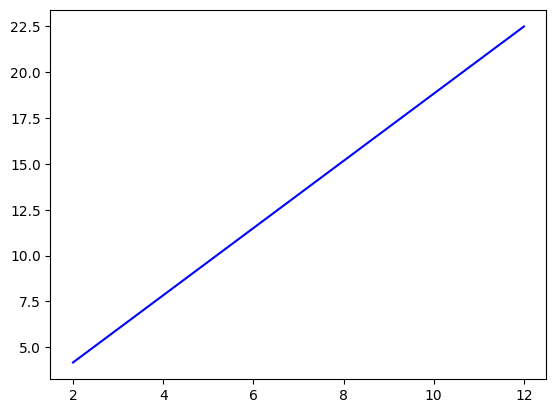

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the equation of the line: -11x - 6y - 3 = 0
def line_equation(x):
    return (11/6) * x + 1/2

# Generate x values for the line
x_values = np.linspace(2, 12, 100)  # Adjust the range based on your data

# Compute corresponding y values using the equation of the line
y_values = line_equation(x_values)

# Plot the line
plt.plot(x_values, y_values, color='blue', label='-11x - 6y - 3 = 0')

# Plot positive labels as green dots and negative labels as red dots
plt.scatter(positive_x, positive_y, color='green', label='Positive')
plt.scatter(negative_x, negative_y, color='red', label='Negative')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points and Line')
plt.legend()

# Show plot
plt.grid(True)
plt.show()
